In [6]:
!pip install scikit-learn
!

## Modules (Collections of database)

In [7]:
#Data Vizualizations
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

#Machine Learning Library
from sklearn.datasets import make_blobs # function to generate aleatory dataset
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import sklearn

#Math and Linear Algebra
import numpy as np
from math import sqrt
#Create DataFrames
import pandas as pd
## Séries históricas disponíveis em
## http://www.b3.com.br/pt_br/market-data-e-indices/servicos-de-dados/market-data/historico/mercado-a-vista/series-historicas/
arquivo_bovespa = (r'C:\Users\kenny\Documents\Projeto CDIA\actions-price-analysis-main\COTAHIST_M102022.txt')


## Estrutura do arquivo disponível em 
## http://www.b3.com.br/data/files/33/67/B9/50/D84057102C784E47AC094EA8/SeriesHistoricas_Layout.pdf
tamanho_campos=[2,8,2,12,3,12,10,3,4,13,13,13,13,13,13,13,5,18,18,13,1,8,7,13,12,3]

dados_acoes=pd.read_fwf(arquivo_bovespa, widths=tamanho_campos, header=0)
dados_acoes

,00,COTAHIST,.2,022BOVESPA 2,022,1031,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,20221003,2.0,ELMD3,10,ELETROMIDIA,ON NM,NaN,R$,1080.0,...,680.0,216300.0,2.469914e+08,0.0,0.0,99991231.0,1.0,0.0,BRELMDACNOR3,100.0
1,1,20221003,2.0,OFSA3,10,OUROFINO S/A,ON NM,NaN,R$,2317.0,...,37.0,7300.0,1.664580e+07,0.0,0.0,99991231.0,1.0,0.0,BROFSAACNOR7,114.0
2,1,20221003,2.0,SMFT3,10,SMART FIT,ON NM,NaN,R$,1568.0,...,8482.0,1950600.0,3.148693e+09,0.0,0.0,99991231.0,1.0,0.0,BRSMFTACNOR1,109.0
3,1,20221003,2.0,HOME34,10,HOME DEPOT,DRN,NaN,R$,5253.0,...,494.0,27860.0,1.467964e+08,0.0,0.0,99991231.0,1.0,0.0,BRHOMEBDR002,143.0
4,1,20221003,2.0,BRGE3,10,ALFA CONSORC,ON,NaN,R$,995.0,...,2.0,200.0,1.912000e+05,0.0,0.0,99991231.0,1.0,0.0,BRBRGEACNOR6,203.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181802,1,20221019,78.0,ITSAI99,70,ITSA,PN N1,0.0,R$,243.0,...,3.0,1500.0,3.639000e+05,906.0,0.0,20230915.0,1.0,0.0,BRITSAACNPR7,412.0
181803,1,20221021,78.0,ITSAI99,70,ITSA,PN N1,0.0,R$,268.0,...,1.0,500.0,1.340000e+05,906.0,0.0,20230915.0,1.0,0.0,BRITSAACNPR7,412.0
181804,1,20221024,78.0,ITSAI99,70,ITSA,PN N1,0.0,R$,259.0,...,1.0,1000.0,2.590000e+05,906.0,0.0,20230915.0,1.0,0.0,BRITSAACNPR7,412.0
181805,1,20221025,78.0,ITSAI99,70,ITSA,PN N1,0.0,R$,255.0,...,4.0,1100.0,2.794000e+05,906.0,0.0,20230915.0,1.0,0.0,BRITSAACNPR7,412.0


<blockquote>Those datas are from Bovespa, in October of the year 2022<blockquote>

In [8]:
#from google.colab import drive
#drive.mount('/content/drive')

## Pre-processing of data 

#### Stage 1 - Structuring

 

##### Appoint columns, delete last line and adapt valus with comma

In [9]:
## Nomear as colunas

dados_acoes.columns = [
"tipo_registro",
"data_pregao",
"cod_bdi",
"cod_negociacao",
"tipo_mercado",
"empresa",
"especificacao_papel",
"prazo_dias_merc_termo",
"moeda_referencia",
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_ultimo_negocio",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"numero_negocios",
"quantidade_papeis_negociados",
"volume_total_negociado",
"preco_exercicio",
"ìndicador_correcao_precos",
"data_vencimento" ,
"fator_cotacao",
"preco_exercicio_pontos",
"codigo_isin",
"num_distribuicao_papel"]

# Eliminar a última linha
linha=len(dados_acoes["data_pregao"])
dados_acoes=dados_acoes.drop(linha-1)

# Ajustar valores com virgula (dividir os valores dessas colunas por 100)
listaVirgula=[
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_ultimo_negocio",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"volume_total_negociado",
"preco_exercicio",
"preco_exercicio_pontos"
]

for coluna in listaVirgula:
    dados_acoes[coluna]=[i/100. for i in dados_acoes[coluna]]


##### Data types

In [10]:
## Informações das variáveis
dados_acoes.info()

## Corrigir tipos de dados
#dados_acoes["data_pregao"]  = pd.to_datetime(dados_acoes["data_pregao"],infer_datetime_format=True) #Transforma para o tipo datetime64
dados_acoes["cod_negociacao"] = dados_acoes["cod_negociacao"].astype('|S') #Transforma o objeto em string
#dados_acoes["empresa"] = dados_acoes["empresa"].astype('|S') #Transforma o objeto em string
dados_acoes["codigo_isin"] = dados_acoes["codigo_isin"].astype('|S') #Transforma o objeto em string


dados_acoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181806 entries, 0 to 181805
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   tipo_registro                 181806 non-null  int64  
 1   data_pregao                   181806 non-null  object 
 2   cod_bdi                       181806 non-null  float64
 3   cod_negociacao                181806 non-null  object 
 4   tipo_mercado                  181806 non-null  int64  
 5   empresa                       181806 non-null  object 
 6   especificacao_papel           181806 non-null  object 
 7   prazo_dias_merc_termo         148349 non-null  float64
 8   moeda_referencia              181806 non-null  object 
 9   preco_abertura                181806 non-null  float64
 10  preco_maximo                  181806 non-null  float64
 11  preco_minimo                  181806 non-null  float64
 12  preco_medio                   181806 non-nul

#### Stage 2 - Remove Missing Data

In [11]:
#Identificar dados faltantes
dados_acoes.isnull().sum()

tipo_registro                       0
data_pregao                         0
cod_bdi                             0
cod_negociacao                      0
tipo_mercado                        0
empresa                             0
especificacao_papel                 0
prazo_dias_merc_termo           33457
moeda_referencia                    0
preco_abertura                      0
preco_maximo                        0
preco_minimo                        0
preco_medio                         0
preco_ultimo_negocio                0
preco_melhor_oferta_compra          0
preco_melhor_oferta_venda           0
numero_negocios                     0
quantidade_papeis_negociados        0
volume_total_negociado              0
preco_exercicio                     0
ìndicador_correcao_precos           0
data_vencimento                     0
fator_cotacao                       0
preco_exercicio_pontos              0
codigo_isin                         0
num_distribuicao_papel              0
dtype: int64

In [12]:
## Remover dados faltantes
dados_acoes = dados_acoes.dropna(axis=1)
dados_acoes.isnull().sum()

tipo_registro                   0
data_pregao                     0
cod_bdi                         0
cod_negociacao                  0
tipo_mercado                    0
empresa                         0
especificacao_papel             0
moeda_referencia                0
preco_abertura                  0
preco_maximo                    0
preco_minimo                    0
preco_medio                     0
preco_ultimo_negocio            0
preco_melhor_oferta_compra      0
preco_melhor_oferta_venda       0
numero_negocios                 0
quantidade_papeis_negociados    0
volume_total_negociado          0
preco_exercicio                 0
ìndicador_correcao_precos       0
data_vencimento                 0
fator_cotacao                   0
preco_exercicio_pontos          0
codigo_isin                     0
num_distribuicao_papel          0
dtype: int64

##### Representação Gráfica e Análise Descritiva

###### Anlysis of column "Indicadores de Correção de Preços"

{'mode': 0    0.0
Name: ìndicador_correcao_precos, dtype: float64, 'mean': 0.0, 'meadian': 0.0}


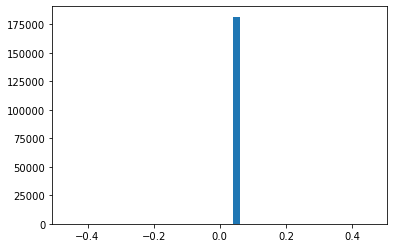

In [13]:
# Parecem haver dados ruidosos aqui
plt.hist(x = dados_acoes["ìndicador_correcao_precos"], rwidth = 0.2)
indicador_correcao_precos = {
    "mode" : dados_acoes["ìndicador_correcao_precos"].mode() ,
    "mean" : dados_acoes["ìndicador_correcao_precos"].mean() ,
    "meadian" : dados_acoes["ìndicador_correcao_precos"].median()
}
# Essa coluna não revela nada relevante
print(indicador_correcao_precos)
#Remoção da coluna dados_acoes["ìndicador_correcao_precos"]
dados_acoes = dados_acoes.drop(["ìndicador_correcao_precos"], axis = "columns")

###### Analysis of column "preco_exercicio_pontos"

{'mode': 0    0.0
Name: preco_exercicio_pontos, dtype: float64, 'mean': 16459467.784341551, 'meadian': 0.0}


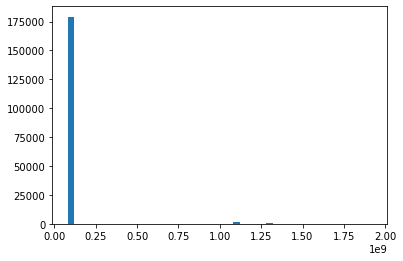

In [14]:
# Parecem haver dados ruidosos aqui
plt.hist(x = dados_acoes["preco_exercicio_pontos"], rwidth = 0.2)
preco_exercicio_pontos = {
    "mode" : dados_acoes["preco_exercicio_pontos"].mode() ,
    "mean" : dados_acoes["preco_exercicio_pontos"].mean() ,
    "meadian" : dados_acoes["preco_exercicio_pontos"].median()
}
# Essa coluna não revela nada relevante
print(preco_exercicio_pontos)
# Remoção da coluna
dados_acoes = dados_acoes.drop(["preco_exercicio_pontos"], axis = "columns")

In [15]:
dados_acoes = dados_acoes.sort_values(by=['data_pregao'])
dados_acoes

,tipo_registro,data_pregao,cod_bdi,cod_negociacao,tipo_mercado,empresa,especificacao_papel,moeda_referencia,preco_abertura,preco_maximo,...,preco_melhor_oferta_compra,preco_melhor_oferta_venda,numero_negocios,quantidade_papeis_negociados,volume_total_negociado,preco_exercicio,data_vencimento,fator_cotacao,codigo_isin,num_distribuicao_papel
0,1,20221003,2.0,b'ELMD3',10,ELETROMIDIA,ON NM,R$,10.80,11.73,...,11.40,11.44,680.0,216300.0,2469914.0,0.00,99991231.0,1.0,b'BRELMDACNOR3',100.0
158385,1,20221003,82.0,b'VALEW731',80,VALEE FM,ON NM,R$,2.90,2.90,...,1.30,2.85,41.0,110300.0,237538.0,69.84,20221118.0,1.0,b'BRVALEACNOR0',204.0
54388,1,20221003,78.0,b'BPACL266',70,BPAC,UNT N2,R$,1.90,1.95,...,0.00,0.00,2.0,1500.0,2900.0,26.60,20221216.0,1.0,b'BRBPACUNT006',113.0
158374,1,20221003,82.0,b'VALEN780',80,VALEE,ON NM,R$,6.00,6.00,...,0.00,0.00,1.0,500.0,3000.0,74.66,20230217.0,1.0,b'BRVALEACNOR0',204.0
103762,1,20221003,82.0,b'NTCOW178',80,NTCOE,ON NM,R$,3.25,3.30,...,2.92,0.00,5.0,21700.0,70780.0,17.87,20221118.0,1.0,b'BRNTCOACNOR5',103.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58580,1,20221031,78.0,b'EGIEL418',70,EGIEE,ON NM,R$,0.77,1.19,...,0.00,0.00,6.0,4600.0,3724.0,41.09,20221216.0,1.0,b'BREGIEACNOR9',119.0
155990,1,20221031,78.0,b'VALEA92',70,VALE,ON NM,R$,4.22,5.02,...,0.00,0.00,153.0,32200.0,135846.0,70.41,20230120.0,1.0,b'BRVALEACNOR0',200.0
173714,1,20221031,78.0,b'BOVVK120',70,BOVV FM,CI,R$,1.03,1.03,...,0.00,0.00,1.0,0.0,1.0,120.00,20221118.0,1.0,b'BRBOVVCTF009',101.0
41283,1,20221031,82.0,b'BBASX278',80,BBASE,ON NM,R$,0.70,0.70,...,0.30,0.88,1.0,200.0,140.0,25.18,20231215.0,1.0,b'BRBBASACNOR3',303.0


#### > Those columns won't be usefull for data analysis, that's why we'll be removing it from the dataset

In [16]:
dados_acoes.drop(["moeda_referencia"], axis=1, inplace=True)
dados_acoes.drop(["fator_cotacao"], axis=1, inplace=True)

#### > Narrow the data by company

In [17]:
x = dados_acoes["empresa"].value_counts()

In [18]:
x[1:15]

VALEE        6220
PETR         4858
BBASE        3892
MGLUE        3198
BOVAE        2973
VALE         2305
COGNE        2023
VIIAE        1942
MGLU         1900
BBAS         1740
ABEVE        1655
CSNAE        1640
IBOVE  FM    1608
USIME        1534
Name: empresa, dtype: int64

##### >> In this case: PETRE

In [19]:
empresa_1 = dados_acoes[dados_acoes["empresa"] == "PETRE"]

## Como estão centrados os preços dos últimos negocios da PETRE?

#### Primeiro os dados dos preços do últimos negócios serão alocados para um objeto Series unidimensional 

In [20]:
PETRE = empresa_1["preco_ultimo_negocio"]
PETRE_arr = np.array(PETRE)
type(PETRE)
type(PETRE_arr)

#Ordenar preço dos últimos negócios da PETRE
PETRE_arr.sort()
print(PETRE_arr)

[1.000e-02 1.000e-02 1.000e-02 ... 4.877e+01 4.927e+01 4.977e+01]


In [21]:
PETRE.describe()

count    10027.000000
mean         4.105726
std          5.729424
min          0.010000
25%          0.240000
50%          1.700000
75%          5.750000
max         49.770000
Name: preco_ultimo_negocio, dtype: float64

#### O dicionário "central_tendency_measures" contém dados das medidas de tendência central do Series em questão

In [22]:

central_tendency_measures = {
    "mean": PETRE.mean(),
    "mode": PETRE.mode(dropna = True),
    "median": PETRE.median(), 
    "max": PETRE.max(),
    "min": PETRE.min(),
}
pd.Series(central_tendency_measures)

mean                                               4.105726
mode      0    0.01
Name: preco_ultimo_negocio, dtype: f...
median                                                  1.7
max                                                   49.77
min                                                    0.01
dtype: object

## How PETRE's actions are distributed


#### Variability Measures
Is there any uniformity between the measures that was found?

In [23]:
'''
# output: [ 1  1  0  4 -5]
variability_measures = {
    "variance" : PETRE.var(),
    "standard deviation": PETRE.std(),
    "shifiting_range" : np.unique(shifting.shifting_range(PETRE_arr)),
    "CV" : variation(PETRE)
}
pd.Series(variability_measures)
'''

'\n# output: [ 1  1  0  4 -5]\nvariability_measures = {\n    "variance" : PETRE.var(),\n    "standard deviation": PETRE.std(),\n    "shifiting_range" : np.unique(shifting.shifting_range(PETRE_arr)),\n    "CV" : variation(PETRE)\n}\npd.Series(variability_measures)\n'

#### A média está centralizada?


In [24]:
#Criar um gráfico que
    #Exibe a diferença entre o coeficiente de variação, a média e o desvio padrão
    

# - Inicial Exploration
##  Analysis of the company "Petrobrás" in October

### > Last traded price (Preço de último negócio)

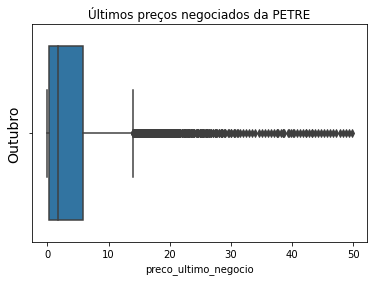

In [25]:
boxplot_empresa1_precoultimo_plt = sns.boxplot(x=empresa_1["preco_ultimo_negocio"]) # colocando o boxplot numa variável para manipular melhor
boxplot_empresa1_precoultimo_plt.set_ylabel('Outubro', fontsize=14) # Aqui você renomeia o eixo que deseja e o tamanho da fonte

boxplot_empresa1_precoultimo_plt.plot() # Aqui é como se o gráfico fosse ocultado até ser usado plt.show()

# em R$ - Reais
plt.title('Últimos preços negociados da PETRE') # O título que se deseja colocar acima do gráfico

plt.show() # Impressão do gráfico

### > Total trading volume (Volume total negociado)

In [26]:
empresa_1["volume_total_negociado"].std()

6105593.487115129

In [27]:
empresa_1["volume_total_negociado"].mean()

710625.8090156578

In [28]:
empresa_1["volume_total_negociado"].median()

38973.0

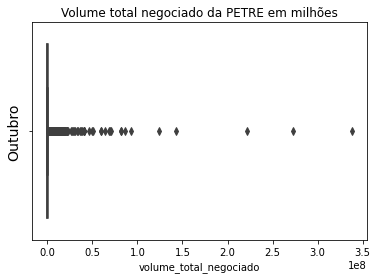

In [29]:
boxplot_empresa1_volumetotal_plt = sns.boxplot(x=empresa_1["volume_total_negociado"])
boxplot_empresa1_volumetotal_plt.set_ylabel('Outubro', fontsize=14)

boxplot_empresa1_volumetotal_plt.plot()


plt.title('Volume total negociado da PETRE em milhões')

plt.show()

### > Number of Trades (Número de negócios)

In [30]:
empresa_1["numero_negocios"].std()

384.4783561749801

In [31]:
empresa_1["numero_negocios"].mean()

124.9536252119278

In [32]:
empresa_1["numero_negocios"].median()

13.0

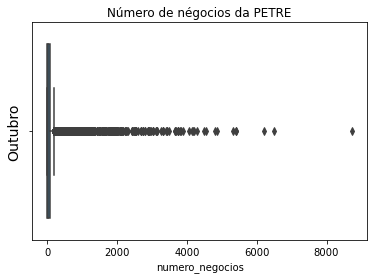

In [33]:
boxplot_empresa1_numeronegocios_plt = sns.boxplot(x=empresa_1["numero_negocios"])
boxplot_empresa1_numeronegocios_plt.set_ylabel('Outubro', fontsize=14)

boxplot_empresa1_numeronegocios_plt.plot()


plt.title('Número de négocios da PETRE')

plt.show()

### > Maximum Closing Prices (Preço máximo das ações)

In [34]:
empresa_1["preco_maximo"].std()

5.776885233995995

In [35]:
empresa_1["preco_maximo"].mean()

4.266220205445269

In [36]:
empresa_1["preco_maximo"].median()

1.9

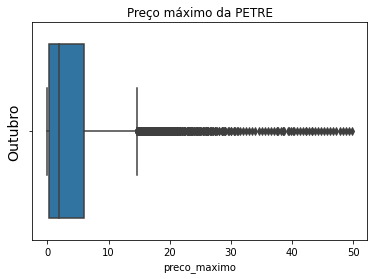

In [37]:
boxplot_empresa1_maximo_plt = sns.boxplot(x = empresa_1["preco_maximo"])
boxplot_empresa1_maximo_plt.set_ylabel('Outubro', fontsize=14)

boxplot_empresa1_maximo_plt.plot()


plt.title('Preço máximo da PETRE') # em R$ - Reais

plt.show()

### > Minimum Closing Prices (Preço mínimo das ações)

In [38]:
empresa_1["preco_minimo"].std()

5.66094762431851

In [39]:
empresa_1["preco_minimo"].mean()

3.928716465543013

In [40]:
empresa_1["preco_minimo"].median()

1.5

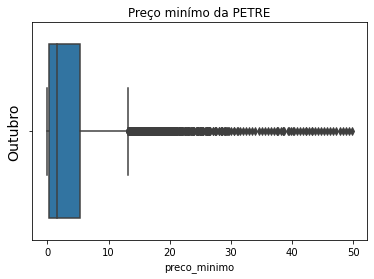

In [41]:
boxplot_empresa1_minimo_plt = sns.boxplot(x = empresa_1["preco_minimo"])
boxplot_empresa1_minimo_plt.set_ylabel('Outubro', fontsize=14)

boxplot_empresa1_minimo_plt.plot()


plt.title('Preço minímo da PETRE') # em R$ - Reais

plt.show()

### > Stock Opening Price (Preço de abertura das ações)

In [42]:
empresa_1["preco_abertura"].mean()

4.09339283933376

In [43]:
empresa_1["preco_abertura"].std()

5.707135405067777

In [44]:
empresa_1["preco_abertura"].median()

1.71

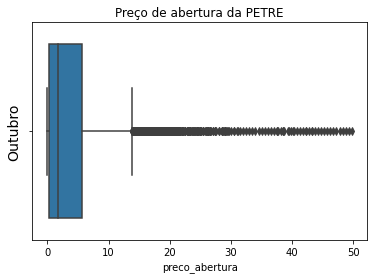

In [45]:
boxplot_empresa1_abertura_plt = sns.boxplot(x = empresa_1["preco_abertura"])
boxplot_empresa1_abertura_plt.set_ylabel('Outubro', fontsize=14)

boxplot_empresa1_abertura_plt.plot()


plt.title('Preço de abertura da PETRE') # em R$ - Reais

plt.show()

### >> Table with some correlations

In [46]:
empresa_1[["preco_abertura", "preco_ultimo_negocio","preco_minimo","preco_maximo","numero_negocios","volume_total_negociado"]].corr()

,preco_abertura,preco_ultimo_negocio,preco_minimo,preco_maximo,numero_negocios,volume_total_negociado
preco_abertura,1.000000,0.997253,0.998526,0.998428,-0.109370,0.207455
preco_ultimo_negocio,0.997253,1.000000,0.998425,0.998670,-0.111930,0.206519
preco_minimo,0.998526,0.998425,1.000000,0.997138,-0.119470,0.207331
preco_maximo,0.998428,0.998670,0.997138,1.000000,-0.102856,0.206406
numero_negocios,-0.109370,-0.111930,-0.119470,-0.102856,1.000000,0.146719
volume_total_negociado,0.207455,0.206519,0.207331,0.206406,0.146719,1.000000


# Data Visualization

### - Scatter Plot

<AxesSubplot:xlabel='preco_abertura', ylabel='preco_ultimo_negocio'>

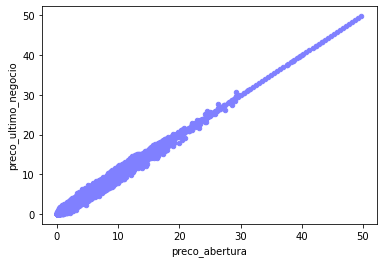

In [47]:
color=np.array([0.5, 0.5, 1]).reshape(1,-1)
empresa_1.plot.scatter(x="preco_abertura",y="preco_ultimo_negocio", c=color)

<AxesSubplot:xlabel='numero_negocios', ylabel='volume_total_negociado'>

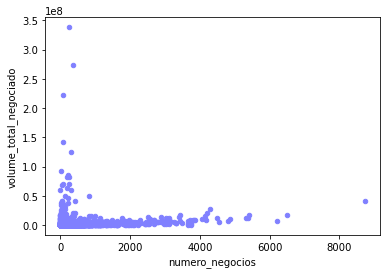

In [48]:
empresa_1.plot.scatter(x="numero_negocios",y="volume_total_negociado",c=color)

<AxesSubplot:xlabel='preco_minimo', ylabel='preco_maximo'>

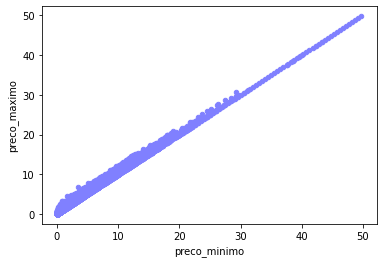

In [49]:
empresa_1.plot.scatter(x="preco_minimo",y="preco_maximo",c=color)

<AxesSubplot:xlabel='numero_negocios', ylabel='preco_ultimo_negocio'>

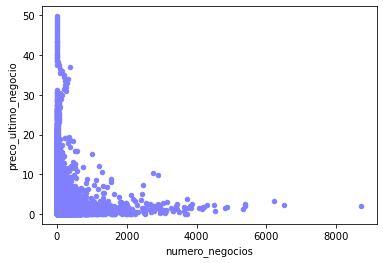

In [50]:
empresa_1.plot.scatter(x="numero_negocios",y="preco_ultimo_negocio",c=color)

<AxesSubplot:xlabel='volume_total_negociado', ylabel='preco_ultimo_negocio'>

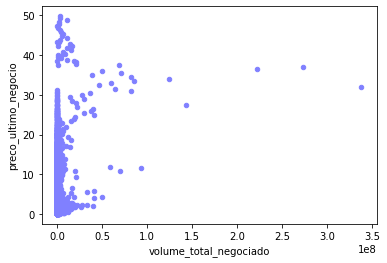

In [51]:
empresa_1.plot.scatter(x="volume_total_negociado",y="preco_ultimo_negocio",c=color)

In [52]:
#Using seaborn
sns.set_palette('Set1')

###### > Creating others dataframes of some companies from the main dataframe and then concatenating them.

In [53]:
empresa_2 = dados_acoes[dados_acoes["empresa"] == "VALEE"]
empresa_3 = dados_acoes[dados_acoes["empresa"] == "BBASE"]
empresa_4 = dados_acoes[dados_acoes["empresa"] == "MGLUE"]
empresa_5 = dados_acoes[dados_acoes["empresa"] == "COGNE"]
empresa_6 = dados_acoes[dados_acoes["empresa"] == "VIIAE"]

In [54]:
empresas = pd.concat([empresa_1, empresa_2, empresa_3, empresa_4, empresa_5, empresa_6])

In [55]:
empresas

,tipo_registro,data_pregao,cod_bdi,cod_negociacao,tipo_mercado,empresa,especificacao_papel,preco_abertura,preco_maximo,preco_minimo,...,preco_ultimo_negocio,preco_melhor_oferta_compra,preco_melhor_oferta_venda,numero_negocios,quantidade_papeis_negociados,volume_total_negociado,preco_exercicio,data_vencimento,codigo_isin,num_distribuicao_papel
103684,1,20221003,82.0,b'PETRW387',80,PETRE,PN N2,9.36,9.66,9.36,...,9.66,0.00,0.00,2.0,7000.0,66570.0,42.02,20221118.0,b'BRPETRACNPR6',204.0
104371,1,20221003,78.0,b'PETRA257',70,PETRE,PN N2,2.25,2.25,2.25,...,2.25,1.60,0.00,1.0,500.0,1125.0,34.02,20230120.0,b'BRPETRACNPR6',204.0
104414,1,20221003,82.0,b'PETRX171',80,PETRE,PN N2,1.45,1.48,1.35,...,1.40,1.21,2.96,5.0,1100.0,1535.0,29.27,20221216.0,b'BRPETRACNPR6',204.0
104429,1,20221003,82.0,b'PETRX229',80,PETRE,PN N2,0.08,0.08,0.08,...,0.08,0.03,0.00,1.0,1000.0,80.0,19.02,20221216.0,b'BRPETRACNPR6',203.0
104026,1,20221003,82.0,b'PETRW412',80,PETRE,PN N2,8.42,9.44,8.42,...,9.44,0.00,0.00,2.0,3600.0,33882.0,41.77,20221118.0,b'BRPETRACNPR6',204.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174292,1,20221031,82.0,b'VIIAW320',80,VIIAE,ON NM,0.30,0.33,0.23,...,0.24,0.13,0.00,79.0,1042200.0,287873.0,3.20,20221118.0,b'BRVIIAACNOR7',101.0
173853,1,20221031,82.0,b'VIIAW230',80,VIIAE,ON NM,0.03,0.03,0.01,...,0.01,0.01,0.02,10.0,48500.0,1031.0,2.30,20221118.0,b'BRVIIAACNOR7',101.0
173841,1,20221031,82.0,b'VIIAW220',80,VIIAE,ON NM,0.03,0.03,0.01,...,0.01,0.00,0.01,21.0,261300.0,3163.0,2.20,20221118.0,b'BRVIIAACNOR7',101.0
173613,1,20221031,82.0,b'VIIAX199',80,VIIAE,ON NM,0.03,0.03,0.02,...,0.02,0.01,0.00,6.0,447900.0,13407.0,2.00,20221216.0,b'BRVIIAACNOR7',101.0


<AxesSubplot:xlabel='data_pregao', ylabel='numero_negocios'>

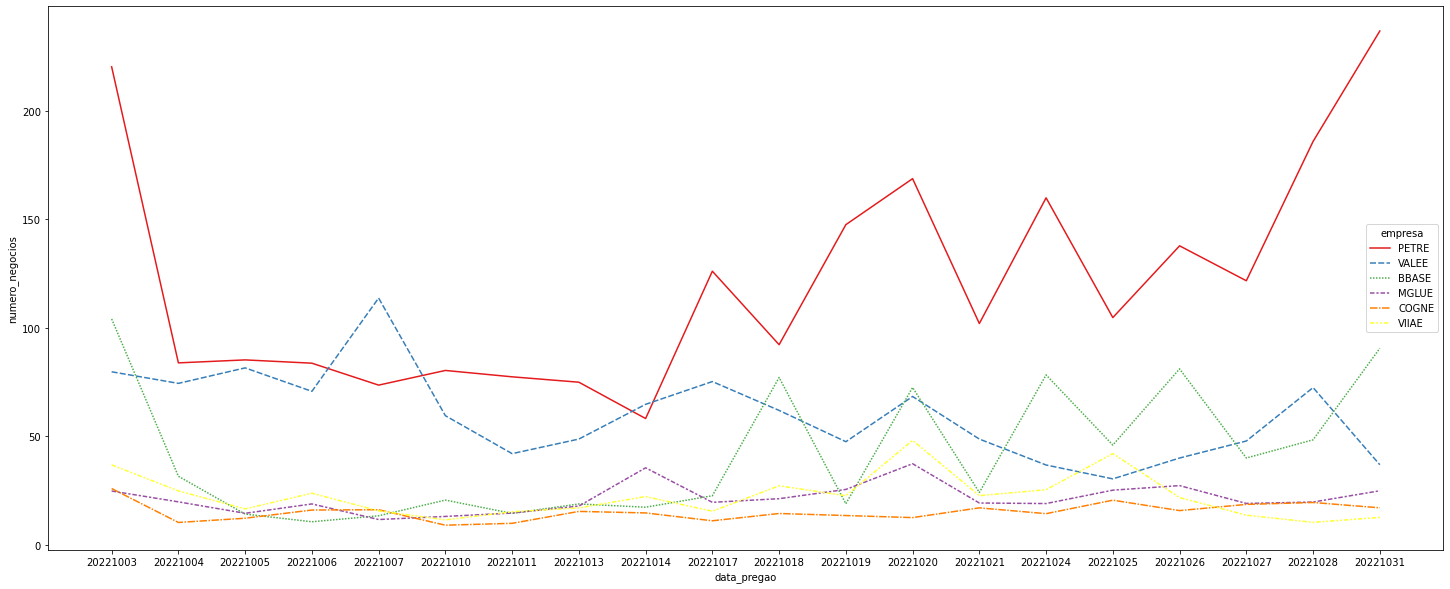

In [104]:
plt.figure(figsize=(25,10))
sns.lineplot(data=empresas, x="data_pregao", y="numero_negocios", hue="empresa", err_style=None, style="empresa")
# Lembrando que 202210 -> mes de outubro em 2022

<AxesSubplot:xlabel='data_pregao', ylabel='preco_ultimo_negocio'>

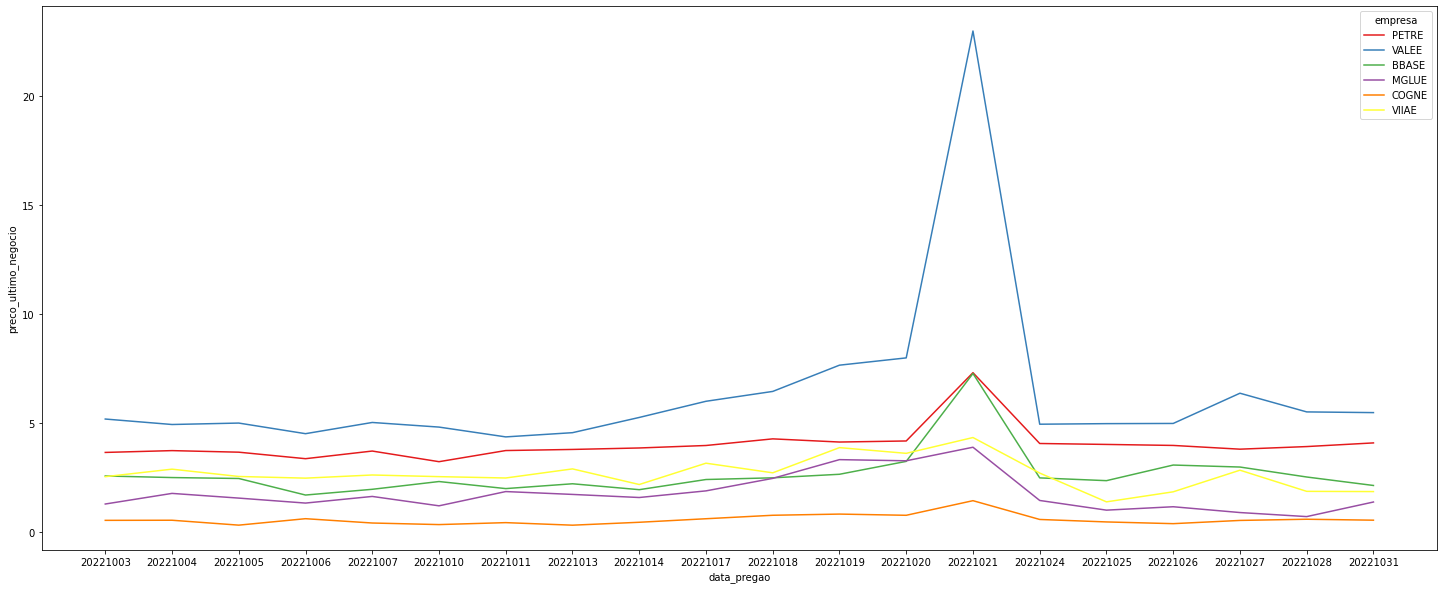

In [107]:
plt.figure(figsize=(25,10))
sns.lineplot(data=empresas, x="data_pregao", y="preco_ultimo_negocio", hue="empresa", err_style=None)

<AxesSubplot:xlabel='data_pregao', ylabel='volume_total_negociado'>

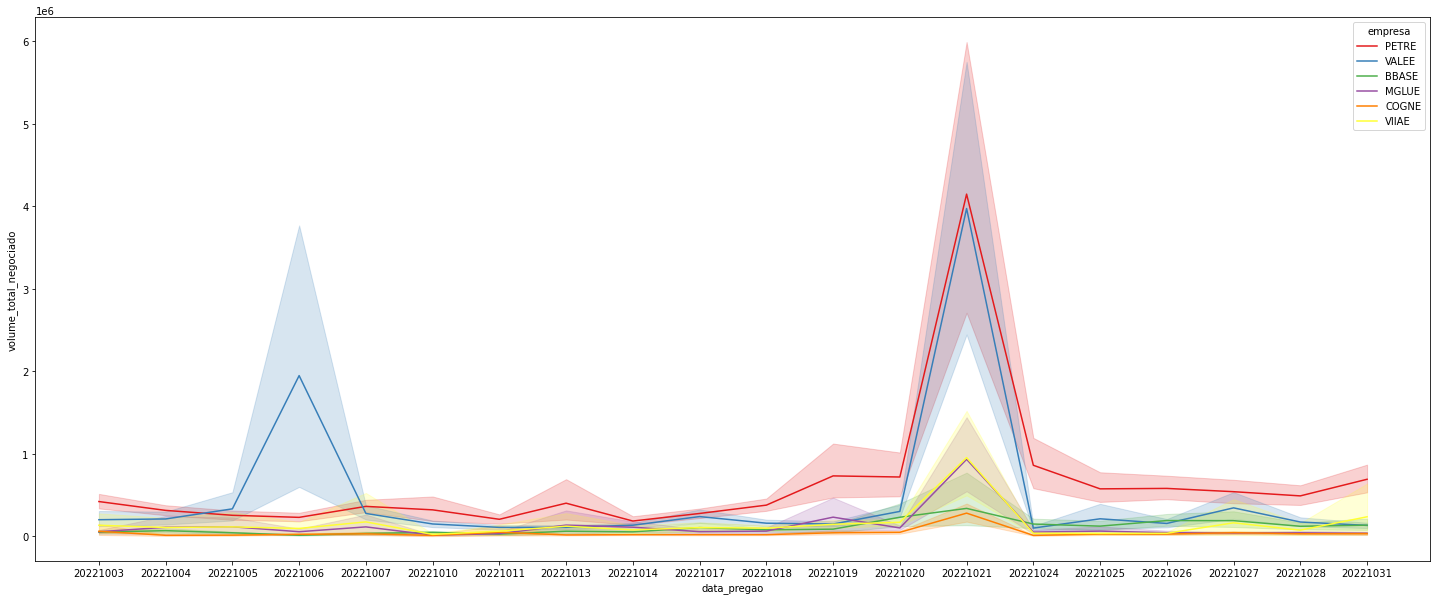

In [58]:
plt.figure(figsize=(25,10))
sns.lineplot(data=empresas, x="data_pregao", y="volume_total_negociado", hue="empresa")

<AxesSubplot:xlabel='preco_ultimo_negocio', ylabel='numero_negocios'>

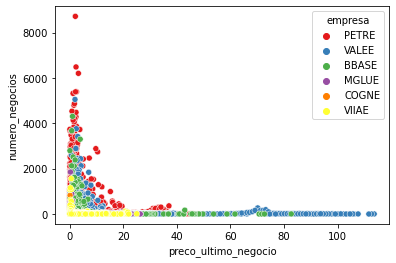

In [59]:
sns.scatterplot(data=empresas, x='preco_ultimo_negocio', y='numero_negocios', hue="empresa")

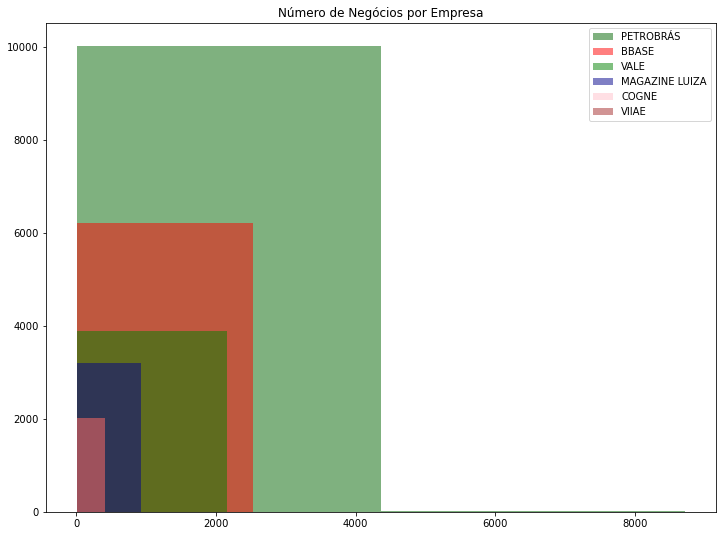

In [108]:
plt.hist(empresa_1['numero_negocios'], alpha=0.5, label='PETROBRÁS', bins=2, color='darkgreen')
plt.hist(empresa_2['numero_negocios'], alpha=0.5, label='BBASE', bins=2, color='red')
plt.hist(empresa_3['numero_negocios'], alpha=0.5, label='VALE', bins=2, color='g')
plt.hist(empresa_4['numero_negocios'], alpha=0.5, label='MAGAZINE LUIZA', bins=2, color='darkblue')
plt.hist(empresa_5['numero_negocios'], alpha=0.5, label='COGNE', bins=2, color='pink')
plt.hist(empresa_5['numero_negocios'], alpha=0.5, label='VIIAE', bins=2, color='brown')
plt.title("Número de Negócios por Empresa")
plt.legend()
plt.rcParams['figure.figsize'] = (12, 9)

<AxesSubplot:xlabel='data_pregao', ylabel='preco_ultimo_negocio'>

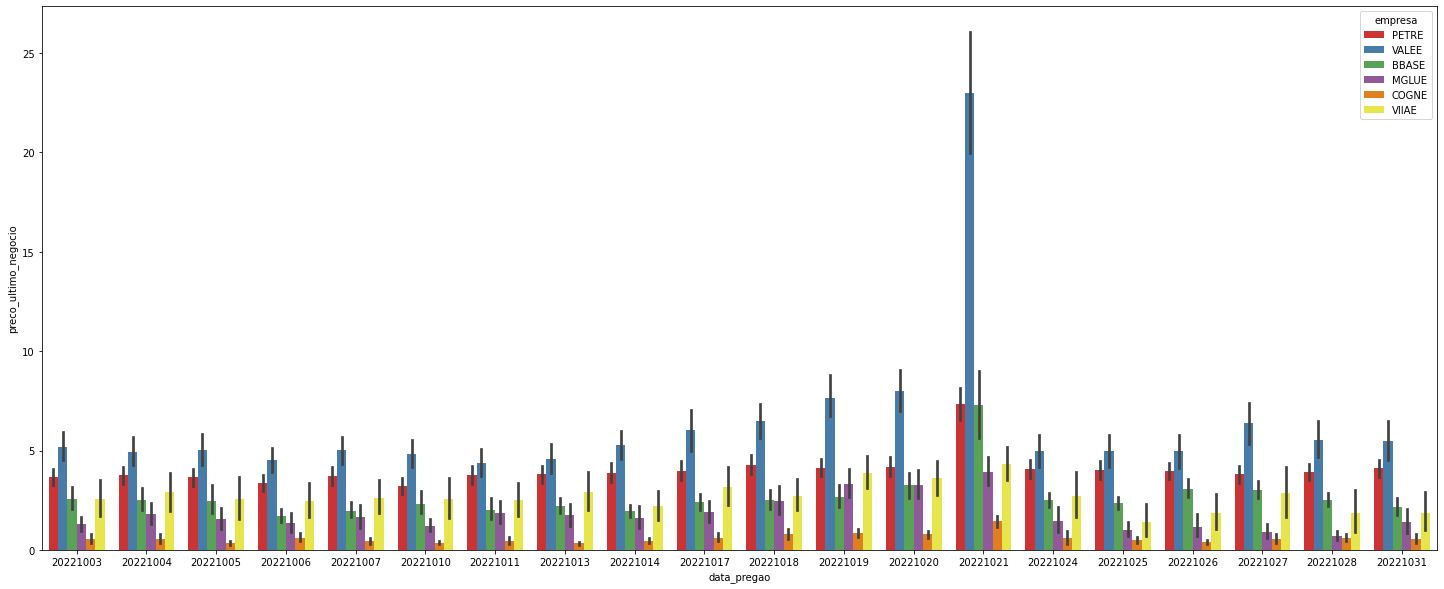

In [62]:
plt.figure(figsize=(25,10))
sns.barplot(data=empresas, x="data_pregao", y="preco_ultimo_negocio", hue = "empresa")

In [113]:
plt.figure(figsize=(13,6))
fig = px.scatter(empresas, x = 'numero_negocios', y = 'preco_maximo', color = 'empresa', hover_name = "empresa", log_x = True, width = 800)
fig.update_traces(marker=dict(size = 10,line = dict(width = 1)),selector=dict(mode = 'markers'))
fig.update_layout(title = 'Análise de Nº de Negócios vs. Preço Máximo')
fig.update_xaxes(title = 'Nº de Negócios')
fig.update_yaxes(title = 'Preço Máximo')
fig.show()

<Figure size 936x432 with 0 Axes>

<AxesSubplot:xlabel='numero_negocios', ylabel='empresa'>

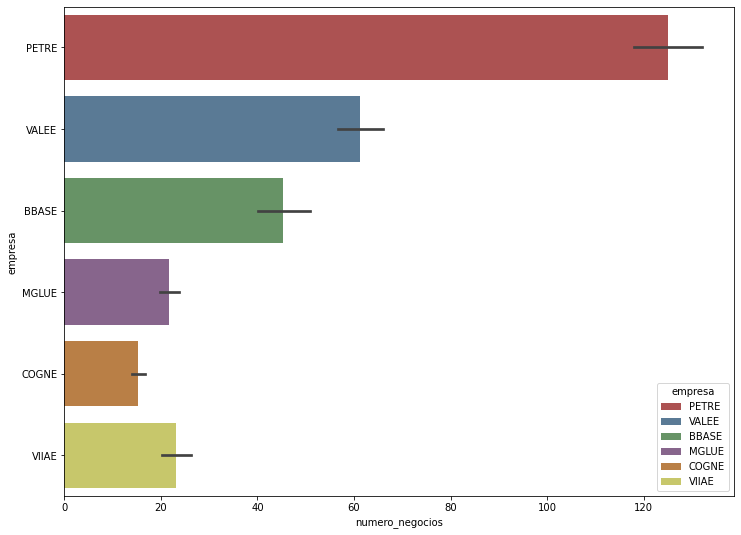

In [64]:
sns.barplot(data=empresas, y="empresa", x="numero_negocios", hue="empresa", saturation=0.45, orient = 'h', linewidth=3, dodge=False)

<AxesSubplot:xlabel='quantidade_papeis_negociados', ylabel='empresa'>

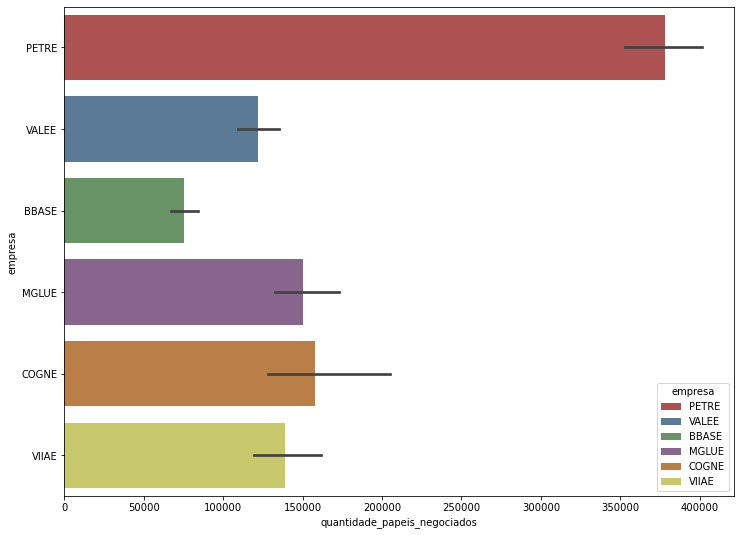

In [134]:
sns.barplot(data=empresas, y="empresa", x="quantidade_papeis_negociados", hue="empresa", saturation=0.45, orient = 'h', linewidth=3, dodge=False)

C:\Users\kenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



AttributeError: 'bool' object has no attribute 'all'

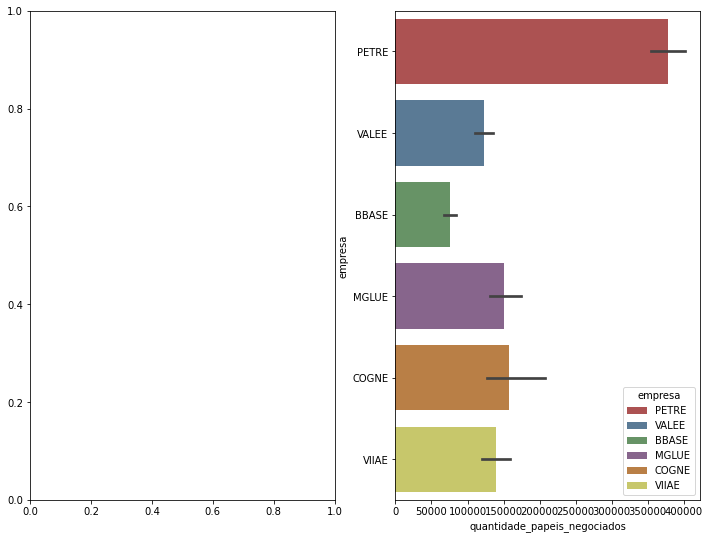

In [138]:
fig, ax =plt.subplots(1,2)
sns.countplot(sns.barplot(data=empresas, y="empresa", x="quantidade_papeis_negociados", hue="empresa", saturation=0.45, orient = 'h', dodge=False), ax=ax[0])
sns.countplot(sns.barplot(data=empresas, y="empresa", x="numero_negocios", hue="empresa", saturation=0.45, orient = 'h', dodge=False), ax=ax[1])
fig.show()

In [65]:
empresas_lite = empresas[["data_pregao", "empresa", "preco_abertura", "preco_maximo", "quantidade_papeis_negociados", "volume_total_negociado" ]]

In [66]:
empresas_lite['quantidade_papeis_negociados'].unique()

array([7.0000e+03, 5.0000e+02, 1.1000e+03, ..., 1.0422e+06, 2.6130e+05,
       4.4790e+05])

In [124]:
emp1 = empresas_lite.loc[(empresas_lite['empresa'] == 'PETRE') & (empresas_lite['preco_maximo'] == 49.77)]
emp2 = empresas_lite.loc[(empresas_lite['empresa'] == 'VALEE') & (empresas_lite['preco_maximo'] == 113.66)]
emp3 = empresas_lite.loc[(empresas_lite['empresa'] == 'BBASE') & (empresas_lite['preco_maximo'] > 80)]
emp4 = empresas_lite.loc[(empresas_lite['empresa'] == 'MGLUE') & (empresas_lite['preco_maximo'] > 26.20)]
emp5 = empresas_lite.loc[(empresas_lite['empresa'] == 'COGNE') & (empresas_lite['preco_maximo'] > 8.91)]
emp6 = empresas_lite.loc[(empresas_lite['empresa'] == 'VIIAE') & (empresas_lite['preco_maximo'] > 24)]

In [68]:
list = []
for value in empresas_lite.columns.values:
    list.append(value)

In [69]:
df = pd.DataFrame(emp1, columns = list)

In [127]:
dff = pd.concat([emp1, emp2, emp3, emp4, emp5, emp6])
dff


,data_pregao,empresa,preco_abertura,preco_maximo,quantidade_papeis_negociados,volume_total_negociado
140329,20221021,PETRE,49.77,49.77,74300.0,3697911.0
157411,20221021,VALEE,113.66,113.66,23500.0,2671010.0
42174,20221021,BBASE,82.68,82.68,28200.0,2331576.0
118797,20221026,MGLUE,26.20,26.30,300.0,7875.0
67010,20221021,COGNE,8.90,8.92,300.0,2673.0
67011,20221024,COGNE,8.92,8.92,200.0,1784.0
163316,20221021,VIIAE,25.00,25.00,395400.0,9885000.0


<AxesSubplot:xlabel='empresa', ylabel='quantidade_papeis_negociados'>

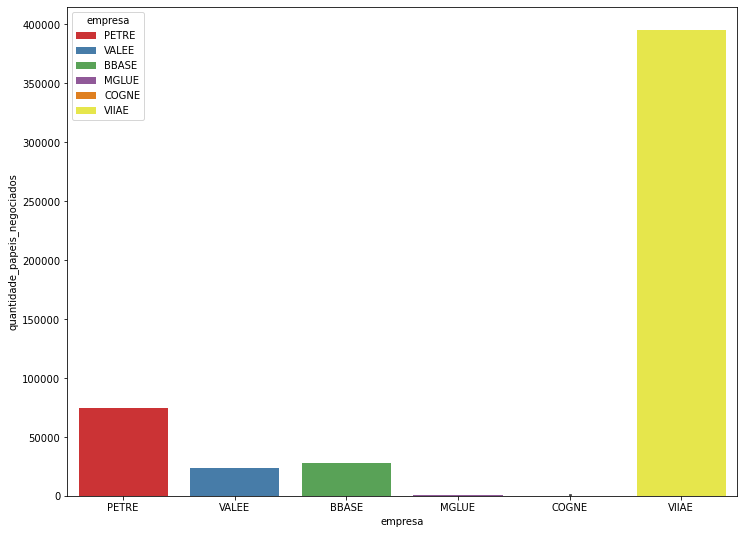

In [133]:
sns.barplot(data=dff, x="empresa", y="quantidade_papeis_negociados", hue="empresa", dodge=False)

# - K-means (Algoritmo de Lloyd Max)

In [71]:
#import k-means module to work with
from sklearn.cluster import KMeans

## -- Comparing Last Price with Number of Trades

### + Company: Petrobrás

#### > Ellbow Method to determine the number of clusters

In [92]:
df_group = empresa_1[['preco_ultimo_negocio', 'numero_negocios']]

,preco_ultimo_negocio,numero_negocios
103684,9.66,2.0
104371,2.25,1.0
104414,1.40,5.0
104429,0.08,1.0
104026,9.44,2.0
...,...,...
126124,0.10,1.0
95483,2.20,2.0
95332,0.01,2.0
58248,1.01,812.0


<AxesSubplot:>

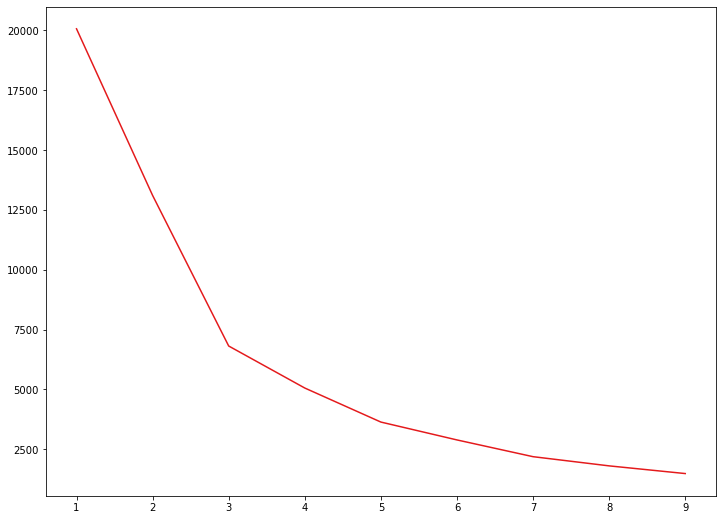

In [73]:
disps = []
scaler_object = StandardScaler()
df_group_elb = scaler_object.fit_transform(df_group)
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_group_elb)
    disps.append(kmeans.inertia_)
sns.lineplot(x=range(1,10), y=disps)

### > Separate the dataset into groups

In [74]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_group)

KMeans(n_clusters=5)

<AxesSubplot:xlabel='preco_ultimo_negocio', ylabel='numero_negocios'>

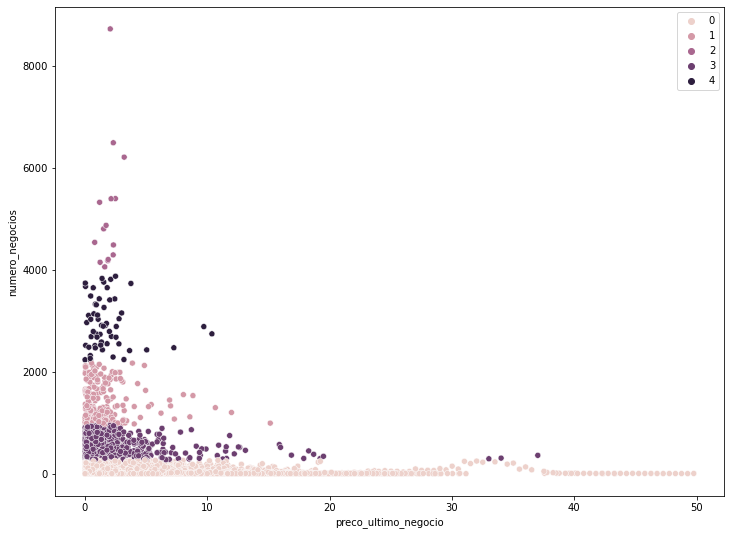

In [75]:
sns.scatterplot(data=df_group, x='preco_ultimo_negocio', y='numero_negocios', hue=kmeans.labels_)

C:\Users\kenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



AttributeError: 'bool' object has no attribute 'all'

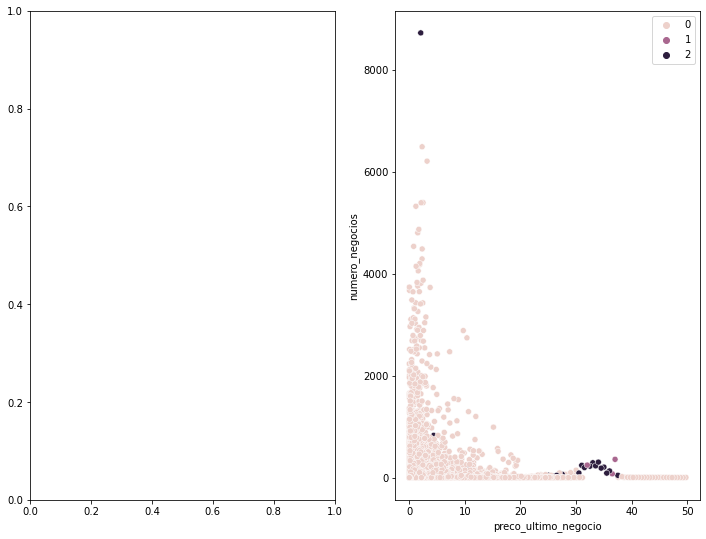

In [94]:
fig, ax =plt.subplots(1,2)

sns.countplot(sns.scatterplot(data=df_group, x='preco_ultimo_negocio', y='numero_negocios', hue=kmeans.labels_), ax=ax[0])
sns.countplot(sns.scatterplot(data=empresas_lite, x='preco_abertura', y='preco_maximo', hue='empresa'), ax=ax[1])
fig.show()

#QUERIA COLOCAR OS DOIS GRÁFICOS ACIMA LADO A LADO, MAS NÃO CONSEGUI ACHAR O ERRO.

### + Company: Cogna

C:\Users\kenny\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.



<AxesSubplot:>

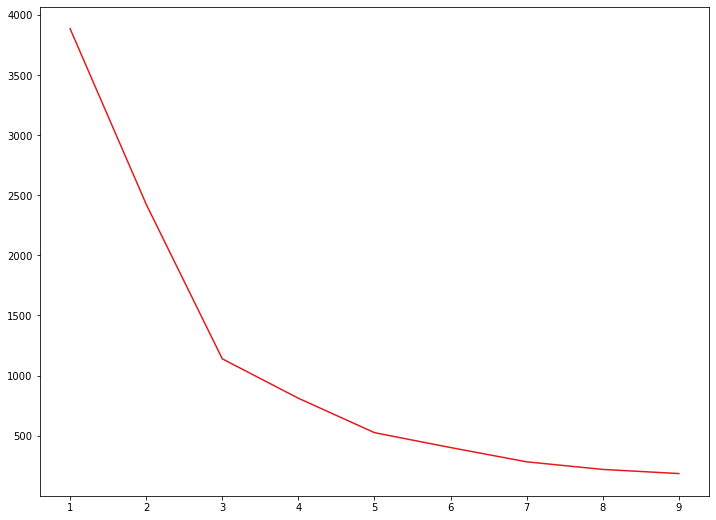

In [76]:
df2_group = empresa_6[['preco_ultimo_negocio', 'numero_negocios']]
disps = []
scaler_object = StandardScaler()
df2_group_elb = scaler_object.fit_transform(df2_group)
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df2_group_elb)
    disps.append(kmeans.inertia_)
sns.lineplot(x=range(1,10), y=disps)

<AxesSubplot:xlabel='preco_ultimo_negocio', ylabel='numero_negocios'>

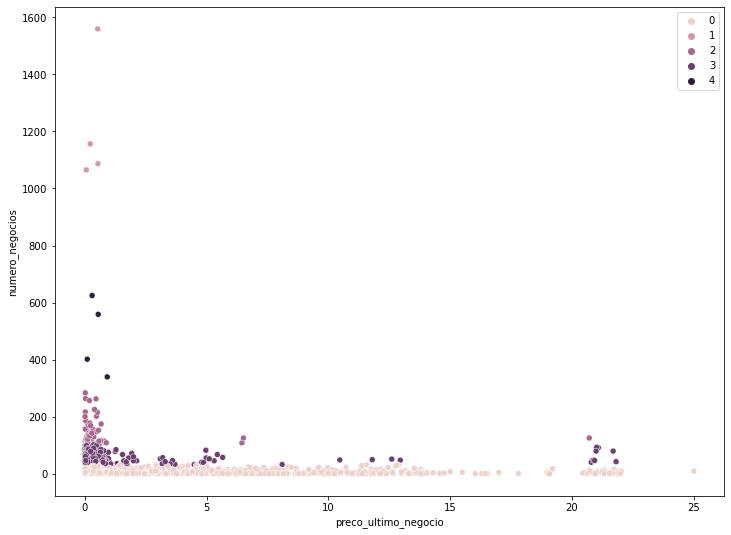

In [77]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df2_group)
sns.scatterplot(data=df2_group, x='preco_ultimo_negocio', y='numero_negocios', hue=kmeans.labels_)


## -- Comparing Total Trading Volume with Opening Price

### + Company: Petrobrás

<AxesSubplot:>

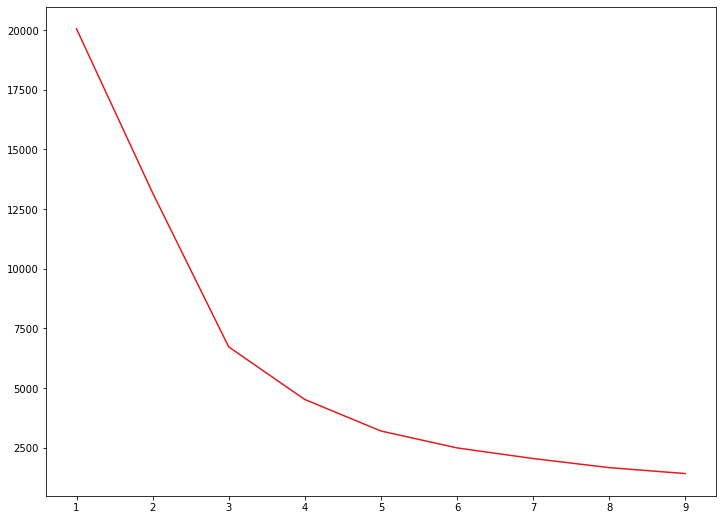

In [78]:
df_group_comparing2 = empresa_1[['volume_total_negociado', 'preco_abertura']]
disps = []
scaler_object = StandardScaler()
df_group_elb_2 = scaler_object.fit_transform(df_group_comparing2)
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_group_elb_2)
    disps.append(kmeans.inertia_)
sns.lineplot(x=range(1,10), y=disps)

<AxesSubplot:xlabel='volume_total_negociado', ylabel='preco_abertura'>

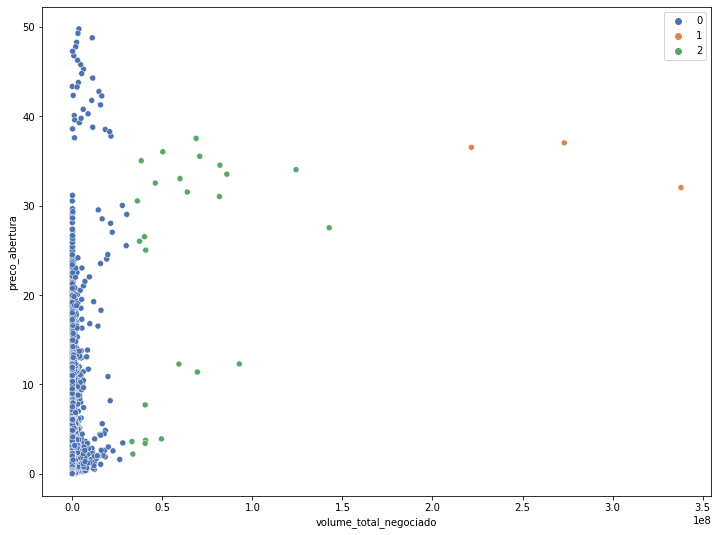

In [79]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_group_comparing2)
sns.scatterplot(data=df_group_comparing2, x='volume_total_negociado', y='preco_abertura', hue=kmeans.labels_, palette="deep")

### + Company: Cogna

<AxesSubplot:>

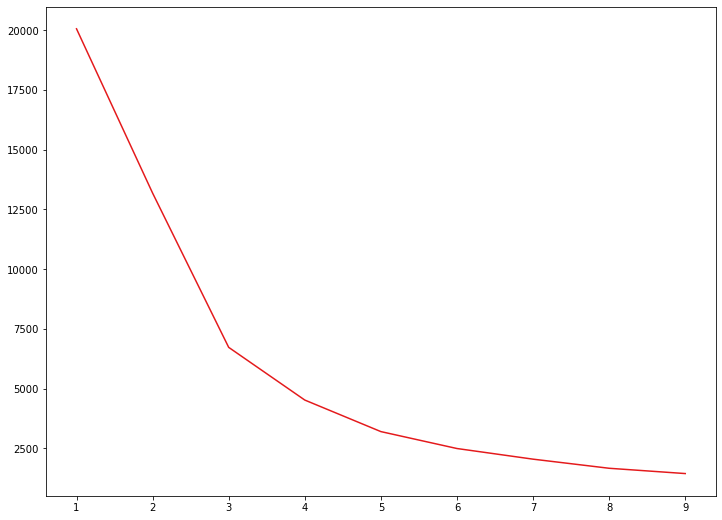

In [80]:
df2_group_comparing2 = empresa_1[['volume_total_negociado', 'preco_abertura']]
disps = []
scaler_object = StandardScaler()
df2_group_elb_2 = scaler_object.fit_transform(df2_group_comparing2)
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df2_group_elb_2)
    disps.append(kmeans.inertia_)
sns.lineplot(x=range(1,10), y=disps)

<AxesSubplot:xlabel='volume_total_negociado', ylabel='preco_abertura'>

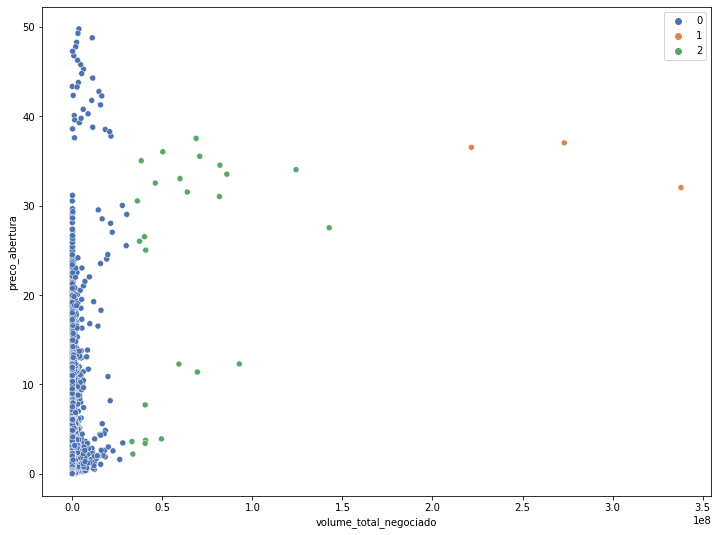

In [81]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df2_group_comparing2)
sns.scatterplot(data=df2_group_comparing2, x='volume_total_negociado', y='preco_abertura', hue=kmeans.labels_, palette="deep")

#### Algum padrão foi dectado?

#### Alguma nova pergunta foi descoberta ao analisar os agrupamentos?